In [11]:
import heapq
import networkx as nx
import timeit
import random

In [12]:
# 空のヒープを作成
H = []

# (value, index)タプル型を代入
heapq.heappush(H, (5, 1))
heapq.heappush(H, (3, 2))

# 最小のエレメントを取得
min_value, argmin_index=heapq.heappop(H)

print(min_value, argmin_index)

3 2


In [1]:
#関数定義
def my_Dijkstra(G, s):

    #空のヒープHを作成して、始点の値を0にする。
    H=[]
    heapq.heappush(H, (0, s))

    #XをGの点集合、D[s]=0,s以外の点VについてはD[v]=∞とする
    X = set(G.nodes)
    D = [float('inf')] * nx.number_of_nodes(G)

    #Xが空でない間、以下を繰り返す。
    while X:
        
        #Xの中でDが最小となる点argmin_indexとその値min_valueをHから取得
        min_value, argmin_index=heapq.heappop(H)

        #argmin_indexがXになければ、コンテニューする。
        if not argmin_index in X:
            continue

        #Xからargmin_indexを取り除く
        X.remove(argmin_index)

        #最短経路が確定したので、Dに登録
        D[argmin_index] = min_value

        #argmin_indexの隣接点を一つずつ取り出す。
        for v in G.neighbors(argmin_index):

            #隣接点がXの中に含まれている場合、以下を行う。
            if v in X:

                #現在の点の値と 隣接点との辺の値の和を取得。
                new_distance = min_value + G.edges[argmin_index, v]['weight']

                #Dに入っている値がnew_distance未満であれば、値を更新する。
                if D[v] > new_distance:
                    heapq.heappush(H, (new_distance, v))

    #Dを返す。            
    return D

In [16]:
# nに1000から10000までの値を1000刻みで代入
for n in range(1000, 10001, 1000):
    #データの読み込み
    G=nx.read_weighted_edgelist(f"random_{n}.edgelist", nodetype=int)

    #実行時間を測定
    num = 10 
    total_time=timeit.timeit('my_Dijkstra(G,0)', globals=globals(), number=num)

    average_time=total_time/num
    print(average_time)

0.014824919999227859
0.06469907000137028
0.13206165000010514
0.19700385000032838
0.31166948000027334
0.40812212000018916
0.498682999999437
0.703863110000384
0.8651322299992898
1.132434400000784


In [17]:
def my_extract_min(D, X):
    arg_min = -1
    min_value = float('inf')
    
    for i in range(len(D)):
        if D[i] < min_value:
            if i in X:
                arg_min = i
                min_value = D[i]
    
    return arg_min

def my_Dijkstra2(G, s):
    X = set(G.nodes)
    D = [float('inf')] * nx.number_of_nodes(G)
    D[s] = 0
    
    while X:
        u = my_extract_min(D, X)
        X.remove(u)
        for v in G.neighbors(u):
            if v in X:
                new_distance = D[u] + G.edges[u, v]['weight']
                if D[v] > new_distance:
                    D[v] = new_distance
    return D

In [19]:
G2=nx.read_weighted_edgelist(f"random_1000.edgelist", nodetype=int)
A = my_Dijkstra2(G2, 0)
B = my_Dijkstra(G2, 0)

print(A)
print(B)

jug = [A[s] == B[s] for s in range(len(A))]
print(all(jug))

[0, 77.0, 67.0, 83.0, 76.0, 63.0, 76.0, 108.0, 77.0, 68.0, 46.0, 98.0, 69.0, 45.0, 54.0, 81.0, 86.0, 71.0, 62.0, 66.0, 87.0, 82.0, 47.0, 73.0, 78.0, 109.0, 58.0, 62.0, 125.0, 76.0, 93.0, 55.0, 80.0, 78.0, 71.0, 73.0, 64.0, 66.0, 83.0, 40.0, 86.0, 44.0, 62.0, 92.0, 59.0, 77.0, 80.0, 71.0, 99.0, 54.0, 93.0, 43.0, 46.0, 87.0, 78.0, 66.0, 69.0, 69.0, 74.0, 77.0, 44.0, 73.0, 51.0, 96.0, 78.0, 80.0, 62.0, 45.0, 73.0, 86.0, 69.0, 83.0, 68.0, 13.0, 80.0, 67.0, 115.0, 68.0, 75.0, 55.0, 82.0, 93.0, 61.0, 47.0, 67.0, 88.0, 70.0, 78.0, 57.0, 58.0, 83.0, 103.0, 56.0, 66.0, 64.0, 74.0, 63.0, 72.0, 77.0, 76.0, 77.0, 66.0, 82.0, 89.0, 54.0, 38.0, 51.0, 40.0, 65.0, 73.0, 66.0, 77.0, 72.0, 84.0, 95.0, 88.0, 80.0, 96.0, 39.0, 50.0, 56.0, 39.0, 61.0, 73.0, 65.0, 80.0, 90.0, 98.0, 86.0, 107.0, 71.0, 66.0, 79.0, 69.0, 68.0, 73.0, 94.0, 82.0, 57.0, 47.0, 44.0, 45.0, 75.0, 78.0, 77.0, 73.0, 88.0, 78.0, 89.0, 82.0, 68.0, 70.0, 65.0, 60.0, 94.0, 67.0, 44.0, 67.0, 97.0, 78.0, 87.0, 76.0, 38.0, 96.0, 86.0, 71.0, 

In [4]:

A = [0.014824919999227859,
0.06469907000137028,
0.13206165000010514,
0.19700385000032838,
0.31166948000027334,
0.40812212000018916,
0.498682999999437,
0.703863110000384,
0.8651322299992898,
1.132434400000784]
B= [0.09888969000021461,
0.34169526000005135,
0.6648314800000662,
1.2086770799996884,
1.6931298999999853,
2.418900329999815,
3.257119039999816,
4.479050629999984,
5.745057749999978,
7.351723720000154]

print(sum([B[s]/A[s] for s in range(10)])/10)

6.050831083976459


In [5]:
import matplotlib.pyplot as plt

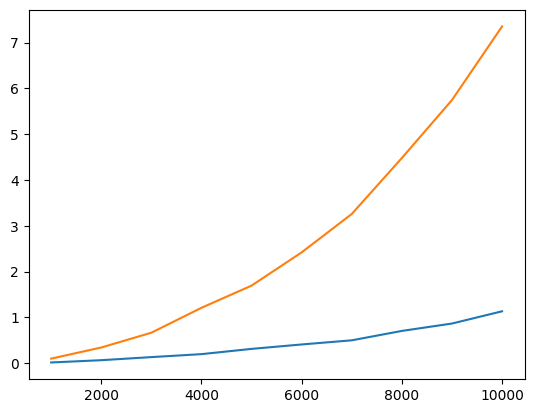

In [6]:
x = [s*1000 for s in range(1, 11)]
plt.plot(x, A, )
plt.plot(x, B)
plt.show()